In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

df = pd.read_excel('18221019.xlsx')

KeyboardInterrupt: 

In [ ]:
# Soal 1.
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.

col = "Jenis Kelamin"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["pink", "blue"]))
layout = go.Layout(title="Frekuensi / Proporsi Jenis Kelamin Responden", height=500, legend=dict(x=0.1, y=1.1))
usia = go.Figure(data = [trace], layout = layout)
iplot(usia)

In [ ]:
# Soal 2. 
# Buat tabel frekuensi dan proporsi untuk jenis kelamin responden.

col = "Jenis Kelamin"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : col})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Jenis Kelamin,Frekuensi,Proporsi
0,Wanita,161,0.538462
1,Pria,138,0.461538


In [ ]:
# Soal 3. 
# Buat histogram untuk data umur responden.

col = "Usia"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
fig = px.histogram(grouped, x="Usia", y="count", title="Histogram Data Umur Responden",nbins=200)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Soal 4. 
# Buat boxplot untuk data umur responden.

col = "Usia"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

fig = px.box(grouped, y="Usia", title="Boxplot Data Umur Responden")
fig.show()

In [ ]:
def describeColumn(df):
 print("Mean                : ", df.mean())
 print("Median              : ", df.median())
 print("Modus               : ", df.mode())
 print("Standar deviasi     : ", df.std())
 print("Variansi            : ", df.var())
 print("Range               : ", df.max()-df.min())
 print("Nilai Minimum       : ", df.min())
 print("Nilai Maksimum      : ", df.max())
 print("Q1                  : ", df.quantile(0.25))
 print("Q2                  : ", df.quantile(0.5))
 print("Q3                  : ", df.quantile(0.75))
 print("IQR                 : ", df.quantile(0.75)-df.quantile(0.25))

In [ ]:
# Soal 5. 
# Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.

describeColumn(df['Usia'])

Mean                :  50.343434343434346
Median              :  23.0
Modus               :  0    19.0
Name: Usia, dtype: float64
Standar deviasi     :  196.94337375294572
Variansi            :  38786.692465192464
Range               :  1987.0
Nilai Minimum       :  15.0
Nilai Maksimum      :  2002.0
Q1                  :  19.0
Q2                  :  23.0
Q3                  :  46.0
IQR                 :  27.0


In [ ]:
# Soal 6. 
# Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)
iqr = df['Usia'].quantile(0.75) - df['Usia'].quantile(0.25)
q1 = df['Usia'].quantile(0.25)
q2 = df['Usia'].quantile(0.5)
q3 = df['Usia'].quantile(0.75)

print("Q1 - 1.5 IQR : ", q1 - 1.5*iqr)
print("Q3 + 1.5 IQR : ", q3 + 1.5*iqr)

if df['Usia'].min() < q1-1.5*iqr :
    print("Terdapat outlier, yaitu", df['Usia'].min())
elif df['Usia'].max() > q3+1.5*iqr :
    print("Terdapat outlier, yaitu", df['Usia'].max())
elif df['Usia'].min() < q1-1.5*iqr and df['Usia'].max() > q3+1.5*iqr :
    print("Terdapat outlier, yaitu", df['Usia'].min(), "dan", df['Usia'].max())
else:
    print("Tidak terdapat outlier.")

Q1 - 1.5 IQR :  -21.5
Q3 + 1.5 IQR :  86.5
Terdapat outlier, yaitu 2002.0


In [ ]:
# Soal 7. 
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi profesi responden.

col = "Pekerjaan"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["black", "red"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Profesi Responden.", height=1500, legend=dict(x=-0.3, y=1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 8. 
# Buat tabel frekuensi dan proporsi untuk profesi responden.

col = "Pekerjaan"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : "Profesi"})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Profesi,Frekuensi,Proporsi
0,Pelajar / Mahasiswa,144,0.486486
1,Karyawan Swasta,71,0.239865
2,Ibu Rumah Tangga,21,0.070946
3,Pegawai Negeri,17,0.057432
4,Pengusaha,12,0.040541
5,"Profesional ( Dokter, Dosen, Pengacara, dll)",12,0.040541
6,BUMN,3,0.010135
7,Karyawan BUMN,3,0.010135
8,Kasir,1,0.003378
9,TNI,1,0.003378


In [ ]:
# Soal 9. 
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

col = "Aktivitas Online Meningkat"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["green", "pink"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Untuk Apakah Aktivitas Online Responden Meningkat atau Tidak Dalam 3 Bulan Terakhir.", height=400, legend=dict(x=0.3, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 10. 
# Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

col = "Aktivitas Online Meningkat"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : col})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Aktivitas Online Meningkat,Frekuensi,Proporsi
0,Ya,143,0.476667
1,Sama saja,115,0.383333
2,Tidak,42,0.140000


<AxesSubplot: title={'center': 'Perbandingan Frekuensi / Proporsi Pengguna 7 Bank'}>

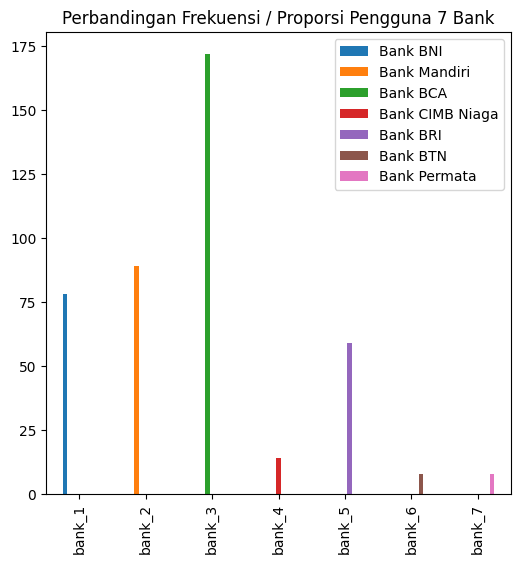

In [ ]:
# Soal 11. 
# Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7
#bank = [df['bank_1'], df['bank_2'], df['bank_3'], df['bank_4'], df['bank_5'], df['bank_6'], df['bank_7']].count().plot(kind='bar', figsize=(6, 6))
#bank

bank1 = df['bank_1'].value_counts()
bank2 = df['bank_2'].value_counts()
bank3 = df['bank_3'].value_counts()
bank4 = df['bank_4'].value_counts()
bank5 = df['bank_5'].value_counts()
bank6 = df['bank_6'].value_counts()
bank7 = df['bank_7'].value_counts()

bank = pd.DataFrame([bank1, bank2, bank3, bank4, bank5, bank6, bank7])
bank.plot(kind='bar',title='Perbandingan Frekuensi / Proporsi Pengguna 7 Bank', figsize=(6, 6))

In [ ]:
# Soal 12. 
# Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.

sum = 300
dataBank = {'Nama Bank' : ['Bank BNI', 'Bank Mandiri', 'Bank BCA', 'Bank CIMB Niaga', 'Bank BRI', 'Bank BTN', 'Bank Permata'],
            'Frekuensi' : [77, 93, 159, 15, 66, 3, 7],
            'Proporsi' : [77/sum, 93/sum, 159/sum, 15/sum, 66/sum, 3/sum, 7/sum]}

dfbank = pd.DataFrame(dataBank)
dfbank

,Nama Bank,Frekuensi,Proporsi
0,Bank BNI,77,0.256667
1,Bank Mandiri,93,0.310000
2,Bank BCA,159,0.530000
3,Bank CIMB Niaga,15,0.050000
4,Bank BRI,66,0.220000
5,Bank BTN,3,0.010000
6,Bank Permata,7,0.023333


In [ ]:
# Soal 13. 
# Hitung confidence interval 95% untuk proporsi pengguna Bank BCA.

from scipy.stats import norm
from math import sqrt

n = len(df['bank_3'])
p = df['bank_3'].count()/n
z = norm.ppf(0.975)
e = z*sqrt(p*(1-p)/n)
print("Confidence interval pengguna Bank BCA :",p-e,"< PBCA <", p+e)

Confidence interval pengguna Bank BCA : 0.5173658965719047 < PBCA < 0.629300770094762


In [ ]:
# Soal 14. 
# Lakukan uji hipotesis berikut:
# H0: PBCA = 0.5
# H1: PBCA ≠ 0.5

a = 0.05
n = len(df['bank_3'])
x = df["bank_3"].count()
p0 = x/n
q0 = 1 - p0
z = ((n * p0) - (n*0.5)) / (sqrt(n * 0.5 * 0.5))
p_val = norm.ppf(1-a)
print("z = " + str(z))
print("p-value = " + str(p_val))

if z > p_val:
    print("H0 ditolak")
else :
    print("H0 gagal ditolak")

z = 2.5403411844343533
p-value = 1.6448536269514722
H0 ditolak


In [ ]:
# Soal 15. 
# Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”.

col = "19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["grey", "blue"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Untuk Preferensi Channel yang Dipilih Responden Untuk Melakukan “Transfer antar bank”.", height=600, legend=dict(x=0, y=1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 16. 
# Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”.

col = "19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : "Channel untuk transfer antar bank"})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Channel untuk transfer antar bank,Frekuensi,Proporsi
0,Mobile Banking,190,0.769231
1,Internet Banking,33,0.133603
2,ATM,21,0.085020
3,Datang ke cabang bank,3,0.012146


<AxesSubplot: title={'center': 'Perbandingan Frekuensi / Proporsi Pengguna 7 eMoney'}>

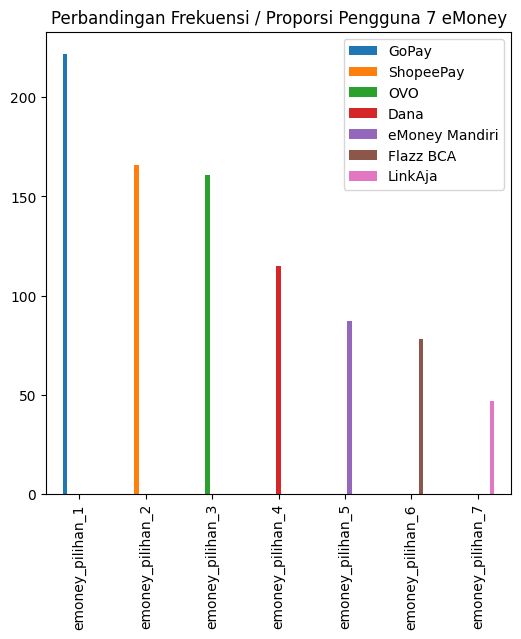

In [ ]:
# Soal 17. 
# Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah).

emoney1 = df['emoney_pilihan_1'].value_counts()
emoney2 = df['emoney_pilihan_2'].value_counts()
emoney3 = df['emoney_pilihan_3'].value_counts()
emoney4 = df['emoney_pilihan_4'].value_counts()
emoney5 = df['emoney_pilihan_5'].value_counts()
emoney6 = df['emoney_pilihan_6'].value_counts()
emoney7 = df['emoney_pilihan_7'].value_counts()

emoney = pd.DataFrame([emoney1, emoney2, emoney3, emoney4, emoney5, emoney6, emoney7])
emoney.plot(kind='bar',title = 'Perbandingan Frekuensi / Proporsi Pengguna 7 eMoney', figsize=(6, 6))

In [ ]:
# Soal 18. 
# Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah).

sum = 300
dataeMoney = {'Nama e-Money' : ['Gopay', 'ShopeePay', 'Ovo', 'Dana', 'eMoney Mandiri', 'Flazz BCA', 'LinkAja'],
            'Frekuensi' : [211, 168, 164, 113, 81, 65, 39],
            'Proporsi' : [211/sum, 168/sum, 164/sum, 113/sum, 81/sum, 65/sum, 39/sum]}

dfemoney = pd.DataFrame(dataeMoney)
dfemoney

,Nama e-Money,Frekuensi,Proporsi
0,Gopay,211,0.703333
1,ShopeePay,168,0.560000
2,Ovo,164,0.546667
3,Dana,113,0.376667
4,eMoney Mandiri,81,0.270000
5,Flazz BCA,65,0.216667
6,LinkAja,39,0.130000


In [ ]:
# Soal 19. 
# Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.

from scipy.stats import norm
from math import sqrt

n1 = len(df['emoney_pilihan_1'])
n2 = len(df['emoney_pilihan_3'])
p1 = df['emoney_pilihan_1'].count()/n1
p2 = df['emoney_pilihan_3'].count()/n2
z = norm.ppf(0.975)
e = z*sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
print("Confidence interval selisih proporsi pengguna Gopay dan OVO :",p1-p2-e,"< PGopay - POvo <", p1-p2+e)

Confidence interval selisih proporsi pengguna Gopay dan OVO : 0.12818244612843432 < PGopay - POvo < 0.2784842205382324


In [ ]:
# Soal 20. 
# Lakukan uji hipotesis berikut:
# H0: PGopay = POvo
# H1: PGopay > POvo

a = 0.05
a2 = 0.025
n1 = len(df['emoney_pilihan_1'])
n2 = len(df['emoney_pilihan_3'])
x1 = df["emoney_pilihan_1"].count()
x2 = df["emoney_pilihan_3"].count()
p0 = (x1+x2)/(n1+n2)
q0 = 1 - p0
propgopay = x1/n1
propovo = x2/n2
z = ((propgopay - propovo)/(sqrt(p0*q0*((1/n1)+(1/n2)))))
p_val = norm.ppf(1-a)
print("z = " + str(z))
print("p-value = " + str(p_val))

if z > p_val:
    print("Hasil = H0 ditolak")
else :
    print("Hasil = H0 gagal ditolak")

z = 5.182940298472184
p-value = 1.6448536269514722
Hasil = H0 ditolak


In [ ]:
# Soal 21. 
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk nominal yang biasa dipakai untuk top up emoney.

col = "39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["black", "red"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Untuk nominal yang biasa dipakai untuk top up emoney.", height=700, legend=dict(x=0, y=1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 22. 
# Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney.

col = "39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : 'Aktivitas Online Meningkat'})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Aktivitas Online Meningkat,Frekuensi,Proporsi
0,Rp 50.001 – Rp 100.000,69,0.248201
1,Rp 150.001 – Rp 300.000,60,0.215827
2,Rp 100.001 – Rp 150.000,58,0.208633
3,> Rp 300.000,57,0.205036
4,"Rp 25.000 – Rp 50.000,-",27,0.097122
5,"< Rp 25.000,-",6,0.021583
6,Tidak menggunakan eMoney,1,0.003597


<AxesSubplot: title={'center': 'Perbandingan Frekuensi / Proporsi Pengguna 7 eCommerce'}>

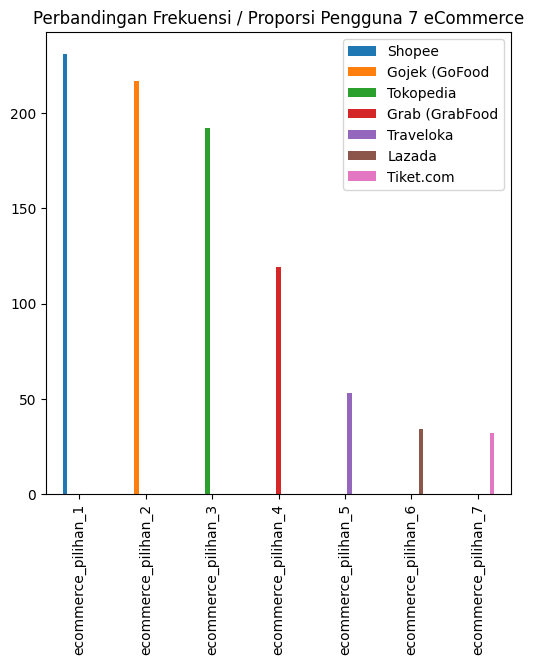

In [ ]:
# Soal 23. 
# Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah).

ecommerce1 = df['ecommerce_pilihan_1'].value_counts()
ecommerce2 = df['ecommerce_pilihan_2'].value_counts()
ecommerce3 = df['ecommerce_pilihan_3'].value_counts()
ecommerce4 = df['ecommerce_pilihan_4'].value_counts()
ecommerce5 = df['ecommerce_pilihan_5'].value_counts()
ecommerce6 = df['ecommerce_pilihan_6'].value_counts()
ecommerce7 = df['ecommerce_pilihan_7'].value_counts()

ecommerce = pd.DataFrame([ecommerce1, ecommerce2, ecommerce3, ecommerce4, ecommerce5, ecommerce6, ecommerce7])
ecommerce.plot(kind='bar', title='Perbandingan Frekuensi / Proporsi Pengguna 7 eCommerce',figsize=(6, 6))

In [ ]:
# Soal 24. 
# Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah).

sum = 300
dataeCommerce = {'Aktivitas Online Meningkat' : ['Shopee', 'Gojek (GoFood)', 'Tokopedia', 'Grab (GrabFood)', 'Traveloka', 'Lazada', 'Tiket.com'],
            'Frekuensi' : [235, 204, 189, 118, 49, 31, 31],
            'Proporsi' : [235/sum, 204/sum, 189/sum, 118/sum, 49/sum, 31/sum, 31/sum]}

dfeCommerce = pd.DataFrame(dataeCommerce)
dfeCommerce

,Aktivitas Online Meningkat,Frekuensi,Proporsi
0,Shopee,235,0.783333
1,Gojek (GoFood),204,0.680000
2,Tokopedia,189,0.630000
3,Grab (GrabFood),118,0.393333
4,Traveloka,49,0.163333
5,Lazada,31,0.103333
6,Tiket.com,31,0.103333


In [ ]:
# Soal 25. 
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk responden yang prefer beli handphone secara offline vs online.

col = "47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["red", "blue"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Untuk responden yang prefer beli handphone secara offline vs online.", height=400, legend=dict(x=0, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 26. 
# Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online

col = "47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : 'Preferensi beli handphone'})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Preferensi beli handphone,Frekuensi,Proporsi
0,offline/ langsung datang ke toko fisik,220,0.811808
1,online,51,0.188192


In [ ]:
# Soal 27. 
# Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk tempat beli makanan online yang pilihan responden.
df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'].replace('Tidak pernah ini', 'Tidak pernah menggunakan layanan Food Delivery', inplace=True) # Memperbaiki data yang salah dari responden
df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'].replace('thuisbezorgd.nl  grabfood.nl ', 'GrabFood', inplace=True) # Memperbaiki data yang salah dari responden

col = "50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["yellow", "pink"]))
layout = go.Layout(title="Perbedaan Frekuensi / Proporsi Untuk Tempat Beli Makanan Online yang Pilihan Responden.", height=700, legend=dict(x=0, y=1.05))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [ ]:
# Soal 28. 
# Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden

col = "50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "Frekuensi", "index" : 'Tempat beli makanan online'})
grouped['Proporsi'] = grouped.apply(lambda x: x['Frekuensi'] / grouped['Frekuensi'].sum(), axis=1)
grouped

,Tempat beli makanan online,Frekuensi,Proporsi
0,GoFood,141,0.481229
1,ShopeeFood,71,0.242321
2,GrabFood,65,0.221843
3,Tidak pernah menggunakan layanan Food Delivery,11,0.037543
4,Air asia food,1,0.003413
5,"Uber Eat, post mates, Eat24",1,0.003413
6,Traveloka eats,1,0.003413
7,Tidak pernah,1,0.003413
8,Maxim food,1,0.003413


In [ ]:
# Soal 29. 
# Lakukan One Way ANOVA untuk Test berikut:
# H0: Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood
# H1: Setidaknya ada dua grup yang memiliki mean umur yang berbeda

from scipy.stats import f_oneway
import scipy.stats as scip

a = 0.05
gofood = df['Usia'][df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'GoFood']
grabfood = df['Usia'][df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'GrabFood']
shopeefood = df['Usia'][df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'ShopeeFood']

gofood.dropna(inplace=True)
grabfood.dropna(inplace=True)
shopeefood.dropna(inplace=True)

arrGofood = np.array(gofood.tolist())
arrGrabfood = np.array(grabfood.tolist())
arrShopeefood = np.array(shopeefood.tolist())

# Menentukan nilai f alpha
falpha = scip.f.ppf(q=1-a, dfn=2, dfd=gofood.count() + grabfood.count() + shopeefood.count() - 3)
print("f alpha =",falpha)
f_statistic, p_value = f_oneway(arrGofood, arrGrabfood, arrShopeefood)
print("f statistic =",f_statistic)
print("p value =",p_value)
# Menentukan apakah H0 ditolak atau tidak
if p_value < falpha:
    print("H0 ditolak, artinya ada perbedaan mean umur antar kelompok dan Statusnya Signifikan.")
else:
    print("H0 gagal ditolak, artinya tidak ada perbedaan mean umur antar kelompok dan Statusnya Tidak Signifikan.")

f alpha = 3.0289700337744754
f statistic = 0.8998609415513454
p value = 0.4078332098253754
H0 ditolak, artinya ada perbedaan mean umur antar kelompok dan Statusnya Signifikan.


# Soal 30.
# 5 Pelajaran dari hasil pengolahan:

1. Berdasarkan hasil pengolahan diatas, distribusi jenis kelamin dengan proporsi wanita lebih besar 0.076924 dari pria. Sebagian besar responden, sebanyak 102 responden berada pada kisaran umur 10-19 tahun. 

2. Berdasarkan hasil pengolahan diatas, profesi paling banyak terdapat pada pelajar/mahasiswa dengan proporsi 0.486486 dengan pengguna Bank BCA paling banyak.

3. Berdasarkan hasil pengolahan diatas, dari responden yang menggunakan e-money,
sebagian besar menggunakan Gopay (0.703333), ShopeePay (0.560000), Ovo (0.546667), Dana (0.376667) sementara hanya sedikit dari responden yang menggunakan eMoney Mandiri (0.270000), Flazz BCA (0.216667), dan LinkAja (0.130000). Degan proporsi untuk nominal yang biasa dipakai untuk top up e-money paling banyak sekitar Rp. 50.001 - Rp. 100.000 (0.248201).

4. Berdasarkan hasil pengolahan diatas, dengan keyakinan 95%, selisih proporsi pengguna GOpay dengan OVO ada di interval 0.12818244612843432 < PGopay - POvo < 0.2784842205382324.

5. Berdasarkan hasil pengolahan diatas, pengguna e-commerce paling banyak terdapat pada Shopee (0.783333), disusul oleh Gojek (GoFood) (0.680000), Tokopedia (0.630000), Grab (GrabFood) (0.393333), Traveloka (0.163333), Lazada (0.103333), dan paling sedikit yaitu Tiket.com (0.103333).
